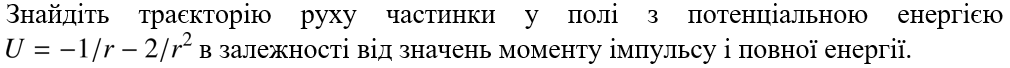

$E = \frac{m \dot{r}^2}{2} + \frac{m r^2 \dot{\varphi}^2}{2} + U(r) = 0$

Обобщённый импульс по $\varphi$ он же момент количества движения

$P_{\varphi} = M = m r^2 \dot{\varphi}$

откуда

$\dot{\varphi} =\frac{M}{ m r^2} $


$U_{eff}(r) = \frac{M^2}{2 m r^2} + U(r)$

$E = \frac{m \dot{r}^2}{2} + \frac{M^2}{2 m r^2} + U(r) = 0$

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
t = var("t")
R = var("r")
assume(R, "real")
assume(R>0)

r = function("r")(t)
M = var("M")
assume(M, "real")

E = var("E")

m = var("m")
assume(m, "real")
assume(m>0)

phi = var("phi")
assume(phi, "real")

U = -1/r

u_eff = function("U_eff")(R)
disp(u_eff)

U_eff = M^2/(2*m*r^2) + U
disp(U_eff)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [108]:
values = [
    E == +0.01,
    M == 2,
    m == 1
]

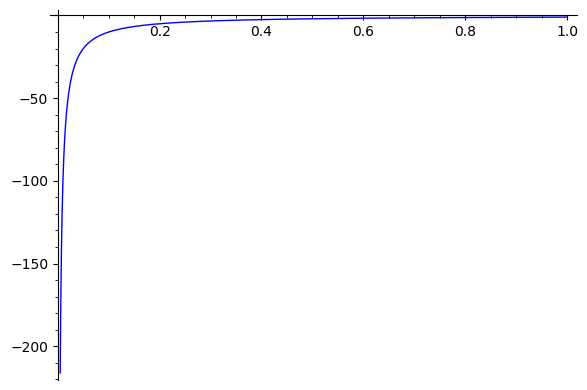

In [109]:
plot(U.subs(r == R), R, 0, 1)

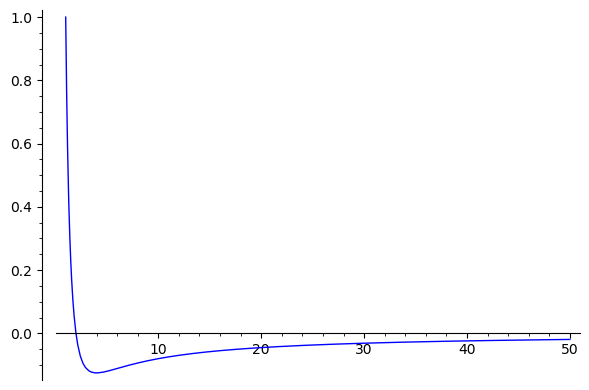

In [110]:
plot(U_eff.subs(r == R).subs(values), R, 1, 50)

In [111]:
eq_E = E == m * r.diff(t)^2/2 + U_eff
disp(eq_E)

<IPython.core.display.Math object>

In [112]:
eq_Eu = E == m * r.diff(t)^2/2 + u_eff
disp(eq_Eu)

<IPython.core.display.Math object>

In [113]:
sol_ru_diff_t = solve(eq_Eu, r.diff(t))
disp(sol_ru_diff_t)

<IPython.core.display.Math object>

In [114]:
sol_r_diff_t = solve(eq_E, r.diff(t))
disp(sol_r_diff_t)

<IPython.core.display.Math object>

In [115]:
dru_dt = sol_ru_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dru_dt))

<IPython.core.display.Math object>

условие $E > U_{eff}(r)$ является необходимым для получения действительных решений задачи поиска максимального и минимального радиуса

In [116]:
sol_neq_real = solve(E - U_eff.subs(r == R) > 0, R)
disp(sol_neq_real)

<IPython.core.display.Math object>

In [117]:
disp(sol_neq_real[0][1].subs(values))

<IPython.core.display.Math object>

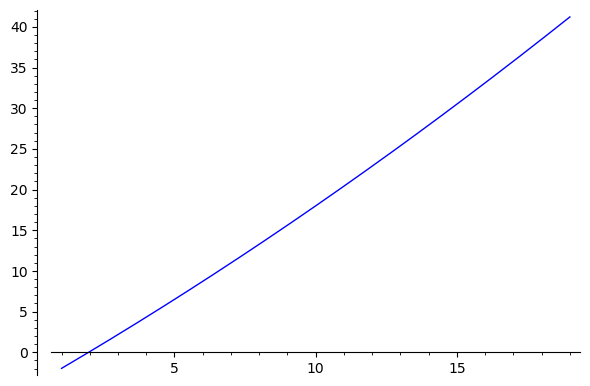

In [118]:
plot(sol_neq_real[0][1].lhs().subs(values), R, 1, 19)

In [119]:
sol_real = solve(E - U_eff.subs(r == R) == 0, R)
disp(sol_real)

<IPython.core.display.Math object>

In [120]:
disp(sol_real[0].subs(values))
sol_real[0].rhs().subs(values).n()

<IPython.core.display.Math object>

-101.961524227066

In [121]:
disp(sol_real[1].subs(values))
sol_real[1].rhs().subs(values).n()

<IPython.core.display.Math object>

1.96152422706632

In [122]:
dr_dt = sol_r_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dr_dt))

<IPython.core.display.Math object>

точки перигея и эпогея определяются 

$\frac{dr}{d{t}} = 0$

In [123]:
sol_r_min_max = solve(dr_dt == 0, r)
disp(sol_r_min_max)

<IPython.core.display.Math object>

In [124]:
disp(sol_r_min_max[0].subs(values))
sol_r_min_max[0].rhs().subs(values).n()

<IPython.core.display.Math object>

-101.961524227066

In [125]:
disp(sol_r_min_max[1].subs(values))
sol_r_min_max[1].rhs().subs(values).n()

<IPython.core.display.Math object>

1.96152422706632

In [126]:
(dt_dr) = (1/dr_dt)
displ("dt = " + latex(dt_dr) + "\\, dr")

<IPython.core.display.Math object>

поскольку

$\dot{\varphi} =\frac{M}{ m r^2} $


$d{\varphi} =\frac{M}{ m r^2}\,dt$

In [127]:
dphi_dr = M/(m*r^2) * dt_dr
displ("d{\\varphi} = " +latex(dphi_dr) + "\\, dr")

<IPython.core.display.Math object>

In [128]:
dphi_dR = dphi_dr.subs(r == R)
displ("d{\\varphi} = " +latex(dphi_dR) + "\\, dr")

<IPython.core.display.Math object>

траектория

$\varphi (r) = \int d{\varphi}$

In [129]:
(m+2*E*M^2>0).subs(values)

1.08000000000000 > 0

In [130]:
assume(M>0)
assume(m+2*E*M^2>0) # for Kepler U = -1/r

phi_R = dphi_dR.integrate(R)
displ("\\varphi = " +latex(phi_R) + "")

<IPython.core.display.Math object>

In [131]:
phi_diff_R = phi_R.diff(R)
disp(phi_diff_R)

<IPython.core.display.Math object>

In [132]:
disp((phi_diff_R - dphi_dR).expand())

<IPython.core.display.Math object>

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 100 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-0.0010532329586645317)'


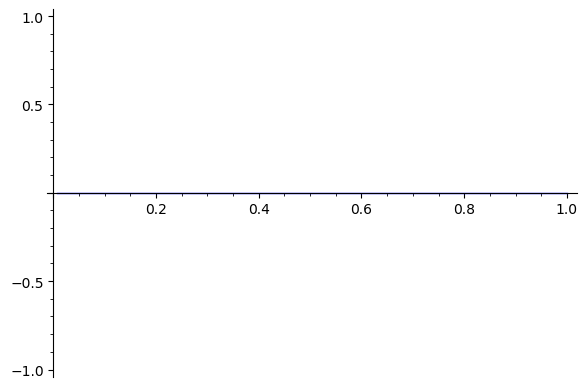

In [133]:
plot((phi_diff_R - dphi_dR).expand().subs(values), R)

In [134]:
sin_minus_phi = phi_R.operands()[0].operands()[0]
disp(sin_minus_phi)

<IPython.core.display.Math object>

In [135]:
s = var("s")
sol_R_sin_minus_phi = solve(sin_minus_phi == s, R)
disp(sol_R_sin_minus_phi)

<IPython.core.display.Math object>

In [136]:
sol_R_phi = sol_R_sin_minus_phi[0].subs(s == -sin(phi))
disp(sol_R_phi)

<IPython.core.display.Math object>

In [137]:
disp(sol_R_phi.rhs().subs(values))

<IPython.core.display.Math object>

In [138]:
disp(sol_R_phi.rhs().numerator())

<IPython.core.display.Math object>

In [139]:
sol_R_phi_den = sol_R_phi.rhs().denominator()
disp(sol_R_phi_den)

<IPython.core.display.Math object>

In [140]:
sin_phi_assimptotics = solve(sol_R_phi_den == 0, sin(phi))
disp(sin_phi_assimptotics)

<IPython.core.display.Math object>

In [141]:
phi_assimptotics = solve(sol_R_phi_den == 0, phi)
disp(sin_phi_assimptotics)

<IPython.core.display.Math object>

In [142]:
disp(sin_phi_assimptotics[0].rhs().subs(values))

<IPython.core.display.Math object>

In [143]:
phi_assimptotic = arcsin(sin_phi_assimptotics[0].rhs())
disp(phi_assimptotic)
phi_assimpt = phi_assimptotic.subs(values)
phi_assimpt

<IPython.core.display.Math object>

1.29515352757863

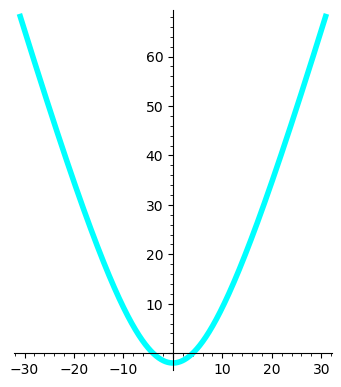

In [144]:
polar_plot(sol_R_phi.rhs().subs(values), (phi, -pi-phi_assimpt+0.15, phi_assimpt-0.15), color=hue(0.5), thickness=4)

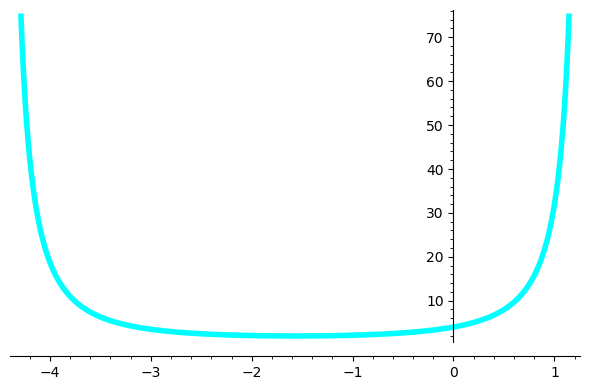

In [145]:
plot(sol_R_phi.rhs().subs(values), (phi, -pi-phi_assimpt+0.15, phi_assimpt-0.15), color=hue(0.5), thickness=4)